Explotary Data Analysis (EDA) - Webtoon and Manhwa Dataset


In this notebook we are going to explore the data to have a better understanding about how we can use the dataset.


Goals:
1. To understand the structure  and quality of the dataset.
2. To visualize the distribution of the data in terms of year and rating

In [18]:
import sys
import os

project_root = os.path.abspath(os.path.join(os.getcwd(), '..'))

if project_root not in sys.path:
    sys.path.append(project_root)

from src import config
MANGA_DATA_PATH = config.WEBTOON_DATA_PATH

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
import ast


In [20]:
sns.set_theme(style="whitegrid")
plt.rcParams['figure.figsize'] = (10, 6)

In [21]:
try:
    df = pd.read_csv(MANGA_DATA_PATH)

except FileNotFoundError:
    print("File not found. Please check the file path and try again.")

In [22]:
df.head()

,id,title_romaji,title_english,format,chapters,volumes,genres,tags,country,popularity,favourites,averageScore,status,description
0,105778,Chainsaw Man,Chainsaw Man,MANGA,NaN,NaN,"['Action', 'Comedy', 'Drama', 'Horror', 'Super...","['Demons', 'Tragedy', 'Urban Fantasy', 'Dissoc...",JP,298644,41451,85.0,RELEASING,The name says it all! Denji's life of poverty ...
1,105398,Na Honjaman Level Up,Solo Leveling,MANGA,201.0,15.0,"['Action', 'Adventure', 'Fantasy']","['Dungeon', 'Male Protagonist', 'Super Power',...",KR,260393,28783,84.0,FINISHED,In a world where awakened beings called “Hunte...
2,101517,Jujutsu Kaisen,Jujutsu Kaisen,MANGA,272.0,30.0,"['Action', 'Drama', 'Supernatural']","['Urban Fantasy', 'Demons', 'Super Power', 'Sh...",JP,226747,20422,80.0,FINISHED,Although Yuji Itadori looks like your average ...
3,30002,Berserk,Berserk,MANGA,NaN,NaN,"['Action', 'Adventure', 'Drama', 'Fantasy', 'H...","['Tragedy', 'Seinen', 'Revenge', 'Male Protago...",JP,221020,35014,93.0,RELEASING,"His name is Guts, the Black Swordsman, a feare..."
4,53390,Shingeki no Kyojin,Attack on Titan,MANGA,141.0,34.0,"['Action', 'Drama', 'Fantasy', 'Mystery']","['Dystopian', 'Anti-Hero', 'War', 'Tragedy', '...",JP,215014,19313,84.0,FINISHED,"In this post-apocalyptic sci-fi story, humanit..."


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18250 entries, 0 to 18249
Data columns (total 14 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             18250 non-null  int64  
 1   title_romaji   18250 non-null  object 
 2   title_english  9402 non-null   object 
 3   format         18250 non-null  object 
 4   chapters       13870 non-null  float64
 5   volumes        10055 non-null  float64
 6   genres         18250 non-null  object 
 7   tags           18250 non-null  object 
 8   country        18250 non-null  object 
 9   popularity     18250 non-null  int64  
 10  favourites     18250 non-null  int64  
 11  averageScore   17522 non-null  float64
 12  status         18250 non-null  object 
 13  description    17805 non-null  object 
dtypes: float64(3), int64(3), object(8)
memory usage: 1.9+ MB


1. id: id of the title
2. title_romaji: pronounciation of the title/ can be used as the original title
3. title_english: english translation of the title
4. format: format of the title. MANGA, ONE_SHOT, NOVEL
5. chapters: number of chapters
6. volumes: number of volumes
7. genres
8. tags
9. country: which country the title belong
10. popularity
11. favourites: how many people added the title in their favourites list
12. averageScore: overall score
13. status: FINISHED, RELEASING, CANCELLED
14. description

Checking missing and duplicate values

In [32]:
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

Missing values in each column:
 id              0
title_romaji    0
format          0
chapters        0
genres          0
tags            0
country         0
popularity      0
favourites      0
averageScore    0
status          0
description     0
dtype: int64


In [25]:
df.drop(columns=["title_english", "volumes"], inplace=True)

The number of missing rows in column "title_english" is not necessary as "title_romaji" also contains the titles so I dropped that column.
"volumes" column is inconsistent for this dataset

In [27]:
duplicates = df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

Number of duplicate rows: 0


In [28]:
df["chapters"].fillna(df["chapters"].median(), inplace=True)

C:\Users\aleyna nur\AppData\Local\Temp\ipykernel_13932\3046566677.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["chapters"].fillna(df["chapters"].median(), inplace=True)


In [30]:
df["averageScore"].fillna(df["averageScore"].median(), inplace=True)

C:\Users\aleyna nur\AppData\Local\Temp\ipykernel_13932\3492082059.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["averageScore"].fillna(df["averageScore"].median(), inplace=True)


In [31]:
df["description"] = df["description"].fillna("")

<Axes: xlabel='format', ylabel='count'>

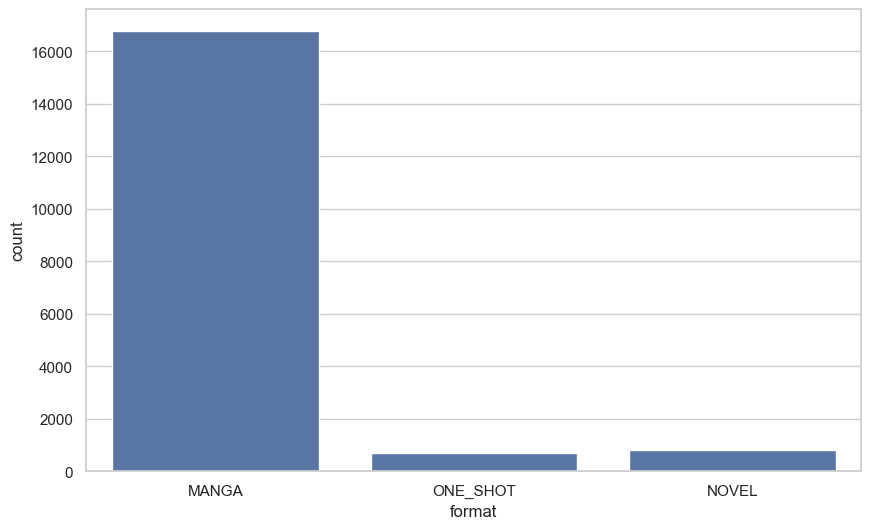

In [34]:
sns.countplot(data=df, x="format")

<Axes: xlabel='genres'>

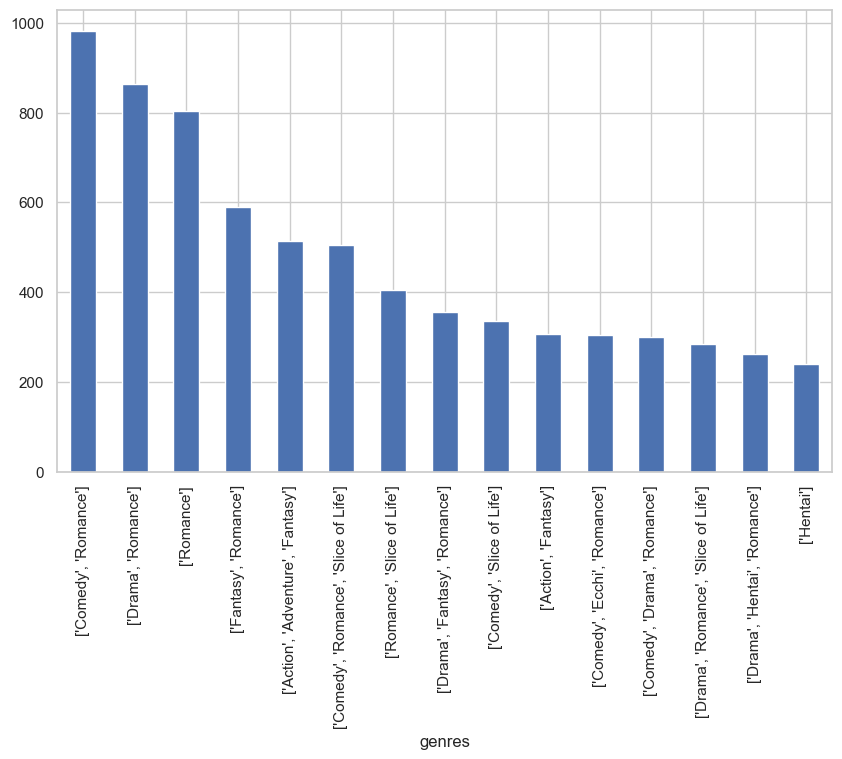

In [35]:
genres_exploded = df["genres"].explode()
genres_exploded.value_counts().head(15).plot(kind="bar")

<Axes: xlabel='tags'>

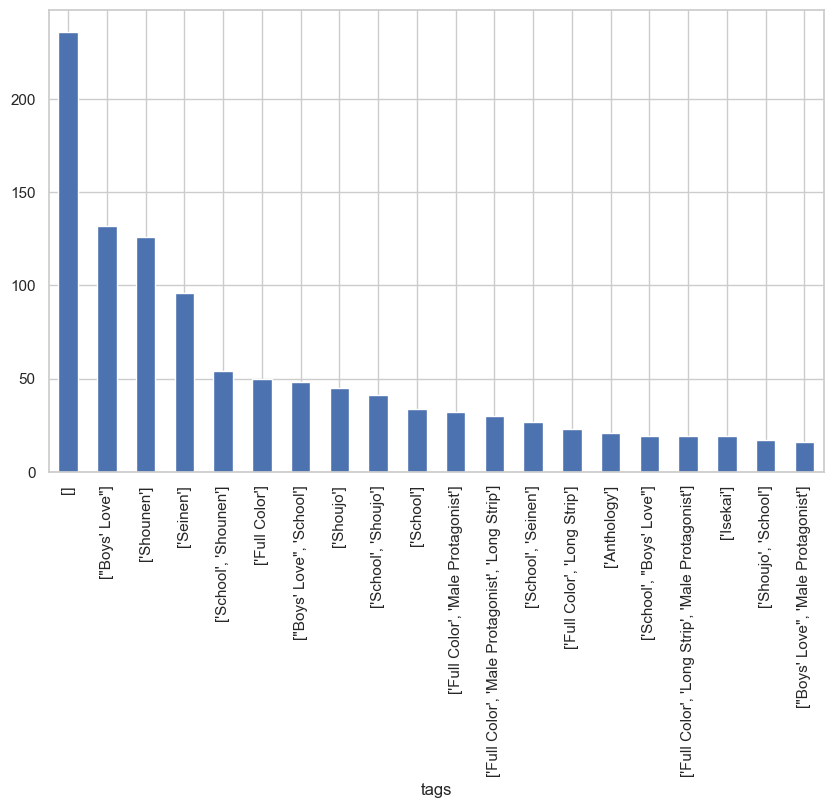

In [36]:
tags_exploded = df["tags"].explode()
tags_exploded.value_counts().head(20).plot(kind="bar")

<Axes: xlabel='country', ylabel='count'>

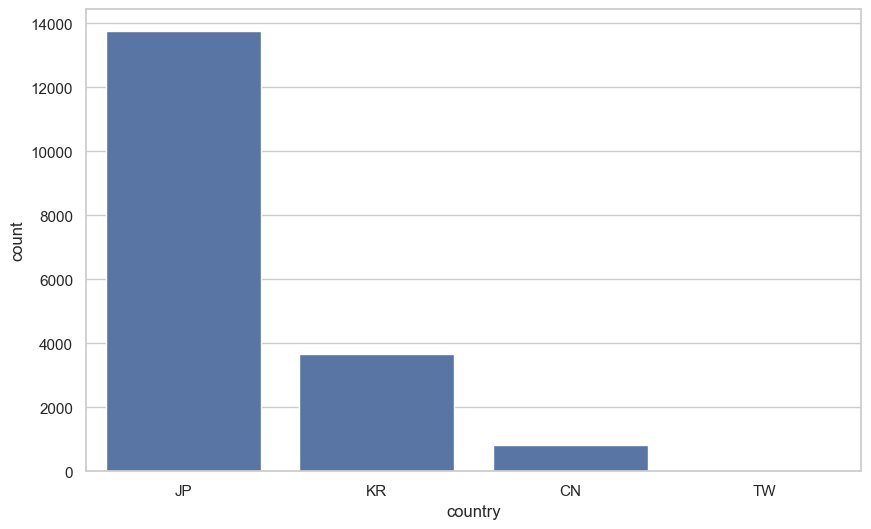

In [37]:
sns.countplot(data=df, x="country")

<Axes: xlabel='status', ylabel='count'>

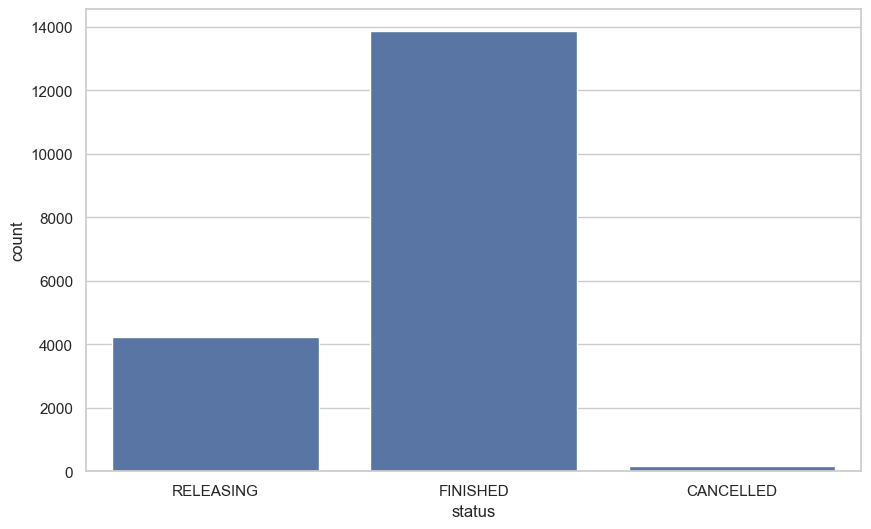

In [38]:
sns.countplot(data=df, x="status")

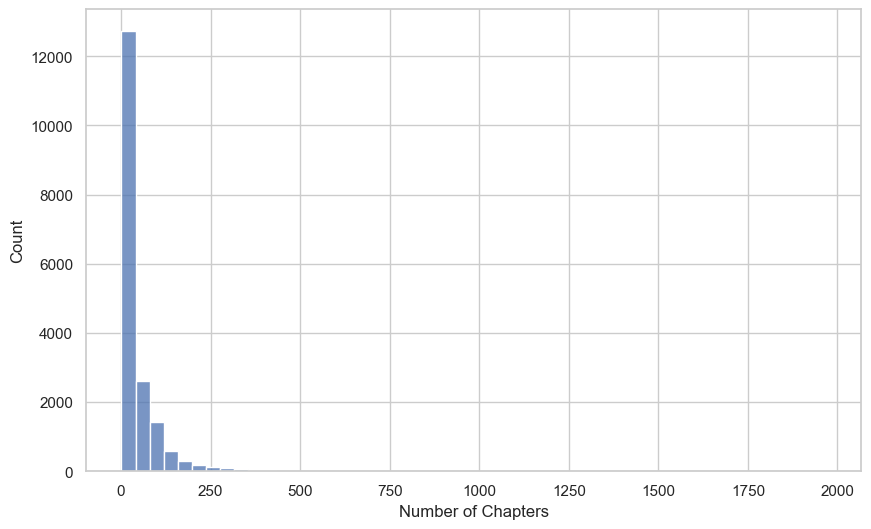

In [41]:
sns.histplot(df["chapters"], bins=50)
plt.xlabel("Number of Chapters")
plt.ylabel("Count")
plt.show()

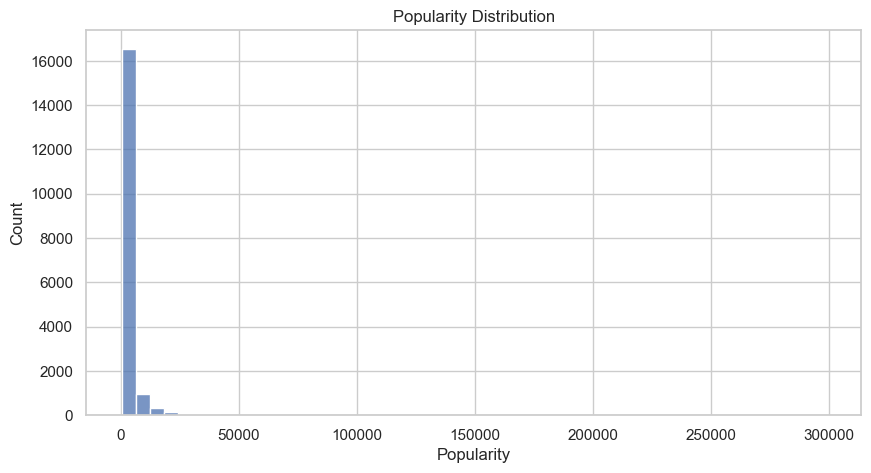